<a href="https://colab.research.google.com/github/SalmaHossamElDin/README/blob/main/Classification_Mini-Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification - Mini-Project 2

***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name:  Salma Hossam El-Din

ID: 46-2981

Tutorial: T01

---

Name: Mariam Hossam El-Din

ID: 46-1048

Tutorial: T01

---


## Dataset Description

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

Each row represents a customer, and each column represents customer attributes as described below.

| Column | Description|
|-|-|
|gender|Whether the customer is a male or a female|
|SeniorCitizen| Whether the customer is a senior citizen or not (1, 0)|
|Partner|Whether the customer has a partner or not (Yes, No)|
|Dependents|Whether the customer has dependents or not (Yes, No)|
|tenure| Number of months the customer has stayed with the company|
|PhoneService|Whether the customer has a phone service or not (Yes, No)|
|MultipleLines|Whether the customer has multiple lines or not (Yes, No, No phone service*)|
|InternetService|Customer’s internet service provider (DSL, Fiber optic, No)|
|OnlineSecurity|Whether the customer has online security or not (Yes, No, No internet service**)|
|OnlineBackup|Whether the customer has online backup or not (Yes, No, No internet service)|
|DeviceProtection|Whether the customer has device protection or not (Yes, No, No internet service)|
|TechSupport|Whether the customer has tech support or not (Yes, No, No internet service)|
|StreamingTV|Whether the customer has streaming TV or not (Yes, No, No internet service) |
|StreamingMovies|Whether the customer has streaming movies or not (Yes, No, No internet service)|
|Contract|The contract term of the customer (Month-to-month, One year, Two year)|
|PaperlessBilling|Whether the customer has paperless billing or not (Yes, No)|
|PaymentMethod|The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))|
|MonthlyCharges|The amount charged to the customer monthly|
|TotalCharges|The total amount charged to the customer|
|Churn|Whether the customer churned or not (Yes or No)|

\* No phone service means the customer's plan does not include calling (could be a data-only plan)

\*\* No internet service means the customer's plan does not include internet/data and so the addon package does not apply

## Importing Libraries & Dataset

In [530]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn")

df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2021/main/data/telecom_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,$29.85/m,$29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,$56.95/m,$1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,$53.85/m,$108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),$42.3/m,$1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,$70.7/m,$151.65,Yes


## Data Inspection

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        6976 non-null   object
 1   gender            7032 non-null   object
 2   SeniorCitizen     7032 non-null   int64 
 3   Partner           7032 non-null   object
 4   Dependents        7032 non-null   object
 5   tenure            7032 non-null   int64 
 6   PhoneService      7032 non-null   object
 7   MultipleLines     7032 non-null   object
 8   InternetService   7032 non-null   object
 9   OnlineSecurity    7032 non-null   object
 10  OnlineBackup      7032 non-null   object
 11  DeviceProtection  7032 non-null   object
 12  TechSupport       7032 non-null   object
 13  StreamingTV       7032 non-null   object
 14  StreamingMovies   7032 non-null   object
 15  Contract          7032 non-null   object
 16  PaperlessBilling  7032 non-null   object
 17  PaymentMethod 

In [ ]:
pd.set_option("display.float_format", "{:.2f}".format)
df.describe()

,SeniorCitizen,tenure
count,7032.00,7032.00
mean,0.16,32.42
std,0.37,24.55
min,0.00,1.00
25%,0.00,9.00
50%,0.00,29.00
75%,0.00,55.00
max,1.00,72.00


In [ ]:
df.isnull().sum()

customerID           56
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges        852
Churn                 0
dtype: int64

In [ ]:
df.dtypes

customerID          object
gender              object
SeniorCitizen        int64
Partner             object
Dependents          object
tenure               int64
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
MonthlyCharges      object
TotalCharges        object
Churn               object
dtype: object

**We have used df.unique() function to ensure that all the columns are of the correct data and types.**

## Data Pre-processing

In [531]:
# In this query, we have dropped the "customerID" column as there are a lot of missing values and this column value's should be unique thus we cannot replace the missing values. Also, we are not going to use it in our visualization.
df = df.drop('customerID', axis=1)

In [532]:
df['MonthlyCharges'] = df['MonthlyCharges'].str.replace('$', '').str.replace(',', '').str.replace('/m', '').str.replace(',', '').astype(float)

print(df.MonthlyCharges)
df.dtypes

0       29.85
1       56.95
2       53.85
3       42.30
4       70.70
        ...  
7027    84.80
7028   103.20
7029    29.60
7030    74.40
7031   105.65
Name: MonthlyCharges, Length: 7032, dtype: float64


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [533]:
df['TotalCharges'] = df['TotalCharges'].str.replace('$', '').str.replace(',', '').astype(float)

print(df.TotalCharges)
df.dtypes

0        29.85
1      1889.50
2       108.15
3      1840.75
4       151.65
         ...  
7027   1990.50
7028   7362.90
7029    346.45
7030    306.60
7031   6844.50
Name: TotalCharges, Length: 7032, dtype: float64


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [534]:
df.TotalCharges.isna().sum()

852

In [535]:
# We used the .loc[] function in order to identify the location of the missing values in "TotalCharges" column.
df.TotalCharges.loc[df.isna().sum(axis=1) > 0]

17     nan
19     nan
23     nan
31     nan
37     nan
        ..
7006   nan
7007   nan
7014   nan
7023   nan
7026   nan
Name: TotalCharges, Length: 852, dtype: float64

In [ ]:
print(df.loc[7007]['TotalCharges'])


nan


In [536]:
df.TotalCharges.loc[df.isna().sum(axis=1) > 0]= df.MonthlyCharges * df.tenure

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [537]:
print(df.loc[7007]['TotalCharges'])

70.65


In [538]:
df.TotalCharges.isna().sum()

0

## Exploratory Data Analysis

**Q1: What are the most correlated attributes with customer churn?**

In [540]:
corr = df.corr()
corr

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.00,0.02,0.22,0.10
tenure,0.02,1.00,0.25,0.83
MonthlyCharges,0.22,0.25,1.00,0.65
TotalCharges,0.10,0.83,0.65,1.00


In [541]:
categorical_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 50:
        categorical_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print("====================================")

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [542]:
df['gender'] = pd.Categorical(df['gender'],
                                      categories=['Female' ,'Male'],
                                      ordered=True)
df['gender']

0       Female
1         Male
2         Male
3         Male
4       Female
         ...  
7027      Male
7028    Female
7029    Female
7030      Male
7031      Male
Name: gender, Length: 7032, dtype: category
Categories (2, object): ['Female' < 'Male']

In [543]:
df['Partner'] = pd.Categorical(df['Partner'],
                                      categories=['Yes' ,'No'],
                                      ordered=True)
df['Partner']

0       Yes
1        No
2        No
3        No
4        No
       ... 
7027    Yes
7028    Yes
7029    Yes
7030    Yes
7031     No
Name: Partner, Length: 7032, dtype: category
Categories (2, object): ['Yes' < 'No']

In [544]:
df['Dependents'] = pd.Categorical(df['Dependents'],
                                      categories=['No' ,'Yes'],
                                      ordered=True)
df['Dependents']

0        No
1        No
2        No
3        No
4        No
       ... 
7027    Yes
7028    Yes
7029    Yes
7030     No
7031     No
Name: Dependents, Length: 7032, dtype: category
Categories (2, object): ['No' < 'Yes']

In [545]:
df['PhoneService'] = pd.Categorical(df['PhoneService'],
                                      categories=['No' ,'Yes'],
                                      ordered=True)
df['PhoneService']

0        No
1       Yes
2       Yes
3        No
4       Yes
       ... 
7027    Yes
7028    Yes
7029     No
7030    Yes
7031    Yes
Name: PhoneService, Length: 7032, dtype: category
Categories (2, object): ['No' < 'Yes']

In [546]:
df['MultipleLines'] = pd.Categorical(df['MultipleLines'],
                                      categories=['No phone service' ,'No' ,'Yes'],
                                      ordered=True)
df['MultipleLines']

0       No phone service
1                     No
2                     No
3       No phone service
4                     No
              ...       
7027                 Yes
7028                 Yes
7029    No phone service
7030                 Yes
7031                  No
Name: MultipleLines, Length: 7032, dtype: category
Categories (3, object): ['No phone service' < 'No' < 'Yes']

In [547]:
df['InternetService'] = pd.Categorical(df['InternetService'],
                                      categories=['DSL' ,'Fiber optic', 'No'],
                                      ordered=True)
df['InternetService']

0               DSL
1               DSL
2               DSL
3               DSL
4       Fiber optic
           ...     
7027            DSL
7028    Fiber optic
7029            DSL
7030    Fiber optic
7031    Fiber optic
Name: InternetService, Length: 7032, dtype: category
Categories (3, object): ['DSL' < 'Fiber optic' < 'No']

In [548]:
df['OnlineSecurity'] = pd.Categorical(df['OnlineSecurity'],
                                      categories=['No' ,'Yes' ,'No internet service'],
                                      ordered=True)
df['OnlineSecurity']

0        No
1       Yes
2       Yes
3       Yes
4        No
       ... 
7027    Yes
7028     No
7029    Yes
7030     No
7031    Yes
Name: OnlineSecurity, Length: 7032, dtype: category
Categories (3, object): ['No' < 'Yes' < 'No internet service']

In [549]:
df['OnlineBackup'] = pd.Categorical(df['OnlineBackup'],
                                      categories=['Yes', 'No' ,'No internet service'],
                                      ordered=True)
df['OnlineBackup']

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
7027     No
7028    Yes
7029     No
7030     No
7031     No
Name: OnlineBackup, Length: 7032, dtype: category
Categories (3, object): ['Yes' < 'No' < 'No internet service']

In [550]:
df['DeviceProtection'] = pd.Categorical(df['DeviceProtection'],
                                      categories=['No', 'Yes' ,'No internet service'],
                                      ordered=True)
df['DeviceProtection']

0        No
1       Yes
2        No
3       Yes
4        No
       ... 
7027    Yes
7028    Yes
7029     No
7030     No
7031    Yes
Name: DeviceProtection, Length: 7032, dtype: category
Categories (3, object): ['No' < 'Yes' < 'No internet service']

In [551]:
df['TechSupport'] = pd.Categorical(df['TechSupport'],
                                      categories=['No', 'Yes' ,'No internet service'],
                                      ordered=True)
df['TechSupport']

0        No
1        No
2        No
3       Yes
4        No
       ... 
7027    Yes
7028     No
7029     No
7030     No
7031    Yes
Name: TechSupport, Length: 7032, dtype: category
Categories (3, object): ['No' < 'Yes' < 'No internet service']

In [552]:
df['StreamingTV'] = pd.Categorical(df['StreamingTV'],
                                      categories=['No', 'Yes' ,'No internet service'],
                                      ordered=True)
df['StreamingTV']

0        No
1        No
2        No
3        No
4        No
       ... 
7027    Yes
7028    Yes
7029     No
7030     No
7031    Yes
Name: StreamingTV, Length: 7032, dtype: category
Categories (3, object): ['No' < 'Yes' < 'No internet service']

In [553]:
df['StreamingMovies'] = pd.Categorical(df['StreamingMovies'],
                                      categories=['No', 'Yes' ,'No internet service'],
                                      ordered=True)
df['StreamingMovies']

0        No
1        No
2        No
3        No
4        No
       ... 
7027    Yes
7028    Yes
7029     No
7030     No
7031    Yes
Name: StreamingMovies, Length: 7032, dtype: category
Categories (3, object): ['No' < 'Yes' < 'No internet service']

In [554]:
df['Contract'] = pd.Categorical(df['Contract'],
                                      categories=['Month-to-month' ,'One year', 'Two year'],
                                      ordered=True)
df['Contract']

0       Month-to-month
1             One year
2       Month-to-month
3             One year
4       Month-to-month
             ...      
7027          One year
7028          One year
7029    Month-to-month
7030    Month-to-month
7031          Two year
Name: Contract, Length: 7032, dtype: category
Categories (3, object): ['Month-to-month' < 'One year' < 'Two year']

In [555]:
df['PaperlessBilling'] = pd.Categorical(df['PaperlessBilling'],
                                      categories=['Yes', 'No'],
                                      ordered=True)
df['PaperlessBilling']

0       Yes
1        No
2       Yes
3        No
4       Yes
       ... 
7027    Yes
7028    Yes
7029    Yes
7030    Yes
7031    Yes
Name: PaperlessBilling, Length: 7032, dtype: category
Categories (2, object): ['Yes' < 'No']

In [556]:
df['PaymentMethod'] = pd.Categorical(df['PaymentMethod'],
                                      categories=['Electronic check' ,'Mailed check', 'Bank transfer (automatic)',
 'Credit card (automatic)'],
                                      ordered=True)
df['PaymentMethod']

0                Electronic check
1                    Mailed check
2                    Mailed check
3       Bank transfer (automatic)
4                Electronic check
                  ...            
7027                 Mailed check
7028      Credit card (automatic)
7029             Electronic check
7030                 Mailed check
7031    Bank transfer (automatic)
Name: PaymentMethod, Length: 7032, dtype: category
Categories (4, object): ['Electronic check' < 'Mailed check' < 'Bank transfer (automatic)' <
                         'Credit card (automatic)']

In [557]:
df['Churn'] = pd.Categorical(df['Churn'],
                                      categories=['No','Yes'],
                                      ordered=True)
df['Churn']

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7027     No
7028     No
7029     No
7030    Yes
7031     No
Name: Churn, Length: 7032, dtype: category
Categories (2, object): ['No' < 'Yes']

In [558]:
#df['Churn'] = df['Churn'].astype('category').cat.codes
#df['Churn']

In [559]:
df_encoded = df.copy()

In [560]:
# Since we've already 'gender' is already of type 'category',
# we can use its .cat.codes attribute to preserve its order

df_encoded['gender'] = df_encoded['gender'].cat.codes
df_encoded['gender']

0       0
1       1
2       1
3       1
4       0
       ..
7027    1
7028    0
7029    0
7030    1
7031    1
Name: gender, Length: 7032, dtype: int8

In [561]:
# Since we've already 'Partner' is already of type 'category',
# we can use its .cat.codes attribute to preserve its order

df_encoded['Partner'] = df_encoded['Partner'].cat.codes
df_encoded['Partner']

0       0
1       1
2       1
3       1
4       1
       ..
7027    0
7028    0
7029    0
7030    0
7031    1
Name: Partner, Length: 7032, dtype: int8

In [562]:
# Since we've already 'Dependents' is already of type 'category',
# we can use its .cat.codes attribute to preserve its order

df_encoded['Dependents'] = df_encoded['Dependents'].cat.codes
df_encoded['Dependents']

0       0
1       0
2       0
3       0
4       0
       ..
7027    1
7028    1
7029    1
7030    0
7031    0
Name: Dependents, Length: 7032, dtype: int8

In [563]:
# Since we've already 'PhoneService' is already of type 'category',
# we can use its .cat.codes attribute to preserve its order

df_encoded['PhoneService'] = df_encoded['PhoneService'].cat.codes
df_encoded['PhoneService']

0       0
1       1
2       1
3       0
4       1
       ..
7027    1
7028    1
7029    0
7030    1
7031    1
Name: PhoneService, Length: 7032, dtype: int8

In [564]:
# Since we've already 'MultipleLines' is already of type 'category',
# we can use its .cat.codes attribute to preserve its order

df_encoded['MultipleLines'] = df_encoded['MultipleLines'].cat.codes
df_encoded['MultipleLines']

0       0
1       1
2       1
3       0
4       1
       ..
7027    2
7028    2
7029    0
7030    2
7031    1
Name: MultipleLines, Length: 7032, dtype: int8

In [565]:
# Since we've already 'InternetService' is already of type 'category',
# we can use its .cat.codes attribute to preserve its order

df_encoded['InternetService'] = df_encoded['InternetService'].cat.codes
df_encoded['InternetService']

0       0
1       0
2       0
3       0
4       1
       ..
7027    0
7028    1
7029    0
7030    1
7031    1
Name: InternetService, Length: 7032, dtype: int8

In [566]:
# Since we've already 'OnlineSecurity' is already of type 'category',
# we can use its .cat.codes attribute to preserve its order

df_encoded['OnlineSecurity'] = df_encoded['OnlineSecurity'].cat.codes
df_encoded['OnlineSecurity']

0       0
1       1
2       1
3       1
4       0
       ..
7027    1
7028    0
7029    1
7030    0
7031    1
Name: OnlineSecurity, Length: 7032, dtype: int8

In [567]:
# Since we've already 'OnlineBackup' is already of type 'category',
# we can use its .cat.codes attribute to preserve its order

df_encoded['OnlineBackup'] = df_encoded['OnlineBackup'].cat.codes
df_encoded['OnlineBackup']

0       0
1       1
2       0
3       1
4       1
       ..
7027    1
7028    0
7029    1
7030    1
7031    1
Name: OnlineBackup, Length: 7032, dtype: int8

In [568]:
# Since we've already 'DeviceProtection' is already of type 'category',
# we can use its .cat.codes attribute to preserve its order

df_encoded['DeviceProtection'] = df_encoded['DeviceProtection'].cat.codes
df_encoded['DeviceProtection']

0       0
1       1
2       0
3       1
4       0
       ..
7027    1
7028    1
7029    0
7030    0
7031    1
Name: DeviceProtection, Length: 7032, dtype: int8

In [569]:
# Since we've already 'TechSupport' is already of type 'category',
# we can use its .cat.codes attribute to preserve its order

df_encoded['TechSupport'] = df_encoded['TechSupport'].cat.codes
df_encoded['TechSupport']

0       0
1       0
2       0
3       1
4       0
       ..
7027    1
7028    0
7029    0
7030    0
7031    1
Name: TechSupport, Length: 7032, dtype: int8

In [570]:
# Since we've already 'StreamingTV' is already of type 'category',
# we can use its .cat.codes attribute to preserve its order

df_encoded['StreamingTV'] = df_encoded['StreamingTV'].cat.codes
df_encoded['StreamingTV']

0       0
1       0
2       0
3       0
4       0
       ..
7027    1
7028    1
7029    0
7030    0
7031    1
Name: StreamingTV, Length: 7032, dtype: int8

In [571]:
# Since we've already 'StreamingMovies' is already of type 'category',
# we can use its .cat.codes attribute to preserve its order

df_encoded['StreamingMovies'] = df_encoded['StreamingMovies'].cat.codes
df_encoded['StreamingMovies']

0       0
1       0
2       0
3       0
4       0
       ..
7027    1
7028    1
7029    0
7030    0
7031    1
Name: StreamingMovies, Length: 7032, dtype: int8

In [572]:
# Since we've already 'Contract' is already of type 'category',
# we can use its .cat.codes attribute to preserve its order

df_encoded['Contract'] = df_encoded['Contract'].cat.codes
df_encoded['Contract']

0       0
1       1
2       0
3       1
4       0
       ..
7027    1
7028    1
7029    0
7030    0
7031    2
Name: Contract, Length: 7032, dtype: int8

In [573]:
# Since we've already 'PaperlessBilling' is already of type 'category',
# we can use its .cat.codes attribute to preserve its order

df_encoded['PaperlessBilling'] = df_encoded['PaperlessBilling'].cat.codes
df_encoded['PaperlessBilling']

0       0
1       1
2       0
3       1
4       0
       ..
7027    0
7028    0
7029    0
7030    0
7031    0
Name: PaperlessBilling, Length: 7032, dtype: int8

In [574]:
# Since we've already 'PaymentMethod' is already of type 'category',
# we can use its .cat.codes attribute to preserve its order

df_encoded['PaymentMethod'] = df_encoded['PaymentMethod'].cat.codes
df_encoded['PaymentMethod']

0       0
1       1
2       1
3       2
4       0
       ..
7027    1
7028    3
7029    0
7030    1
7031    2
Name: PaymentMethod, Length: 7032, dtype: int8

In [575]:
# Since we've already 'Churn' is already of type 'category',
# we can use its .cat.codes attribute to preserve its order

#df_encoded['Churn'] = df_encoded['Churn'].cat.codes
#df_encoded['Churn']

In [576]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [577]:
df['Churn'] = df['Churn'].astype('category').cat.codes
df['Churn'] 

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int8

In [578]:
df['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [579]:
df['Churn'].value_counts() / df['Churn'].count()


0   0.73
1   0.27
Name: Churn, dtype: float64

**Visualization**

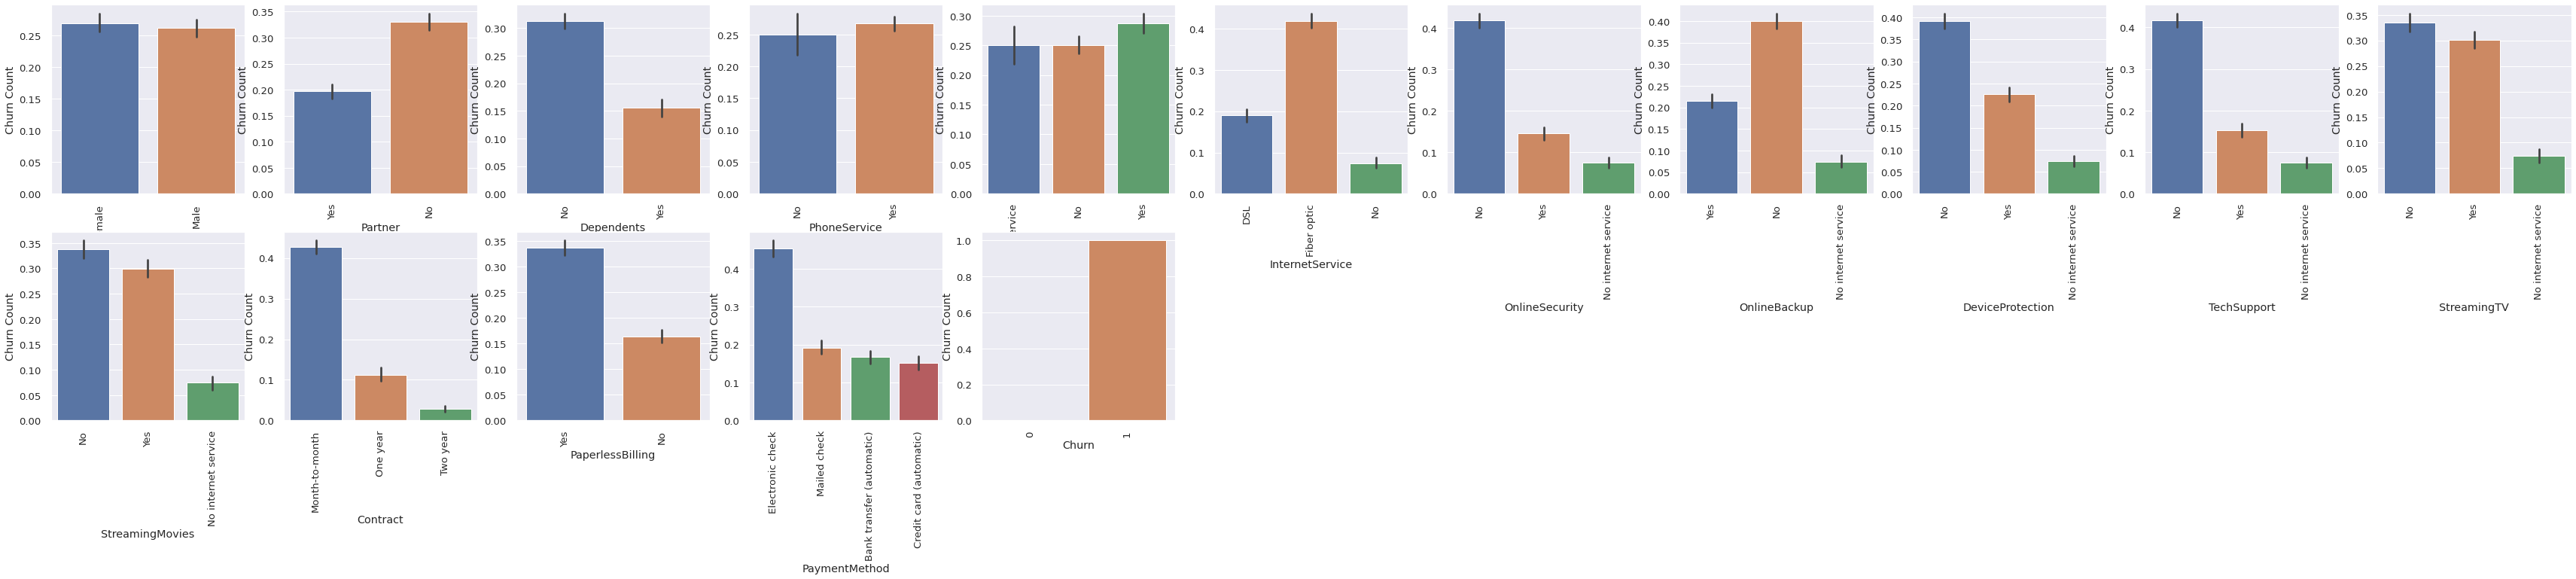

In [580]:
# Plotting how every feature correlate with the "Churn"
categorical_features = categorical_col.copy()
sns.set(font_scale=1.2)
plt.figure(figsize=(60, 60))

for i, column in enumerate(categorical_features, 1):
    plt.subplot(11, 11, i)
    g = sns.barplot(x=column, y='Churn', data=df)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    plt.ylabel('Churn Count')
    plt.xlabel(f'{column}')

**Answer for Q1**: 

*   **Gender:** Females are the more likely to churn from the 
business. 

*   **Partner:** Customers who don't have parters are more likely to churn.  

*   **Dependents:** Customers who don't have dependence are more likely to churn. 

*  **PhoneService:** Customers who have phone services are more likely to churn. 

*   **MultipleLines:** Customers who have Multiple lines are more likely to churn.  
  
*   **InternetService:** Customers who have Fiber optic internet service provider are more likely to churn. 


*   **OnlineSecurity:** Customers who don't have an Online Security are more likely to churn. 


*   **OnlineBackup:** Customers who don't have an Online Backup are more likely to churn.


*   **DeviceProtection:** Customers who don't have Device Protection are more likely to churn.   


*   **TechSupport:** Customers who don't have Technical Support are more likely to churn. 


*   **StreamingTV:** Customers who don't have TV streaming services are more likely to churn. 

*   **StreamingMovies:**Customers who don't have Movies streaming services are more likely to churn.   

*   **Contract:** Customers who have a monthly contract are more likely to churn, whereas Customers who have a 2 year contract are more likely to support the business ( less likely to churn).

*   **PaperlessBilling:** Customers who have paperless billing are more likely to churn. 

*   **PaymentMethod:** Customers who have their payment method as an electronic check are more likely to churn, on the other hand Customers who have their payment method as bank transfer and credit cards (automatic) are least likely to churn.     



        
    
            
    


**Q2: Which payment method has the highest churn rate?**

**Visualization**

Text(0.5, 0, 'Churn')

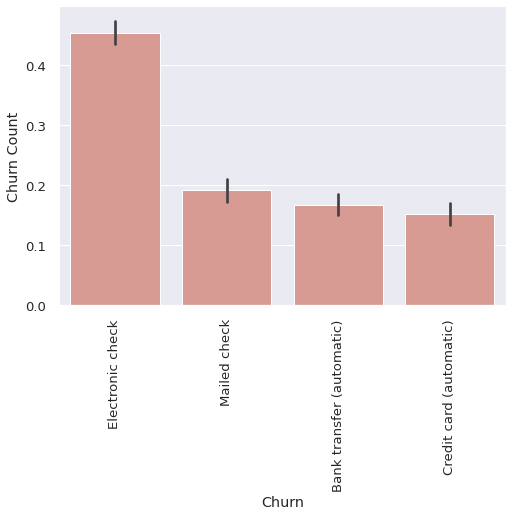

In [581]:
g = sns.barplot(x='PaymentMethod', y='Churn', data=df, color="salmon", saturation=.5)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.ylabel('Churn Count')
plt.xlabel(f'{column}')

**Answer for Q2**: Customers who pay using Electronic Chekcs are the most customers who churn.

**Q3: After how many months do customers commonly churn?** (Hint: show and interpret the distribution)

**Visualization**

Text(0.5, 1.0, 'Violin Plot of Churn vs Tenure')

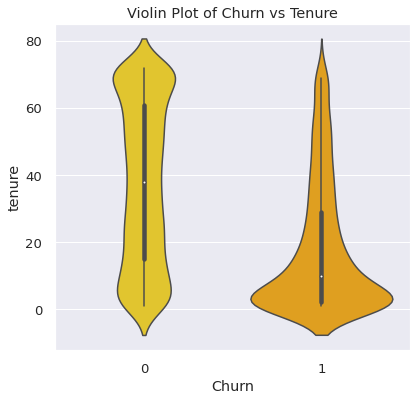

In [582]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121) # 121 is equivalent to writing: nrows=1, ncols=2, index=1
sns.violinplot(x='Churn', y='tenure', data=df, palette='Wistia', ax=ax)
ax.set_title('Violin Plot of Churn vs Tenure')

**Answer for Q3**: Your answer here

## Modelling

In [583]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

## Evaluation

In [584]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [585]:
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 99.86%
_______________________________________________
CLASSIFICATION REPORT:
               No     Yes  accuracy  macro avg  weighted avg
precision    1.00    1.00      1.00       1.00          1.00
recall       1.00    1.00      1.00       1.00          1.00
f1-score     1.00    1.00      1.00       1.00          1.00
support   3614.00 1308.00      1.00    4922.00       4922.00
_______________________________________________
Confusion Matrix: 
 [[3613    1]
 [   6 1302]]

Test Result:
Accuracy Score: 71.42%
_______________________________________________
CLASSIFICATION REPORT:
               No    Yes  accuracy  macro avg  weighted avg
precision    0.81   0.47      0.71       0.64          0.72
recall       0.79   0.50      0.71       0.65          0.71
f1-score     0.80   0.48      0.71       0.64          0.72
support   1549.00 561.00      0.71    2110.00       2110.00
_______________________________________________
Confusion Matrix: 
 [[1224  325]
 [ 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


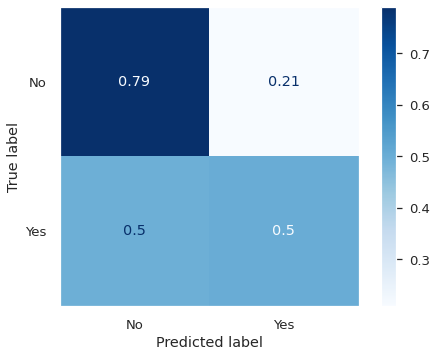

In [586]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(tree_clf, X_test, y_test, cmap='Blues', normalize='true')
plt.grid(False)

## Decision Tree Visualization

In [587]:
import graphviz
from sklearn.tree import export_graphviz
dot_data = export_graphviz(tree_clf, out_file=None,
                           feature_names=X.columns,
                           class_names=['No', 'Yes'],
                           filled=True, rounded=True,
                           special_characters=True) 
graph = graphviz.Source(dot_data)
graph
# alternatively, to export:
# graph.render('churn')

## Bonus (Optional)